In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data from
# https://archive.ics.uci.edu/dataset/222/bank+marketing
df = pd.read_csv('/content/drive/Othercomputers/My iMac/Documents/actualJobs/DS4A/Admision_IDATA/iDATA/bank+marketing/bank/bank.csv', delimiter=';')


In [4]:
df.value_counts()

age  job          marital  education  default  balance  housing  loan  contact   day  month  duration  campaign  pdays  previous  poutcome  y  
19   student      single   primary    no        103     no       no    cellular  10   jul    104       2         -1     0         unknown   yes    1
45   services     single   secondary  no        1757    yes      no    cellular  20   apr    1010      3          326   1         other     no     1
     technician   married  secondary  no        88      no       no    cellular  29   aug    150       2         -1     0         unknown   no     1
                                                49      no       no    cellular  29   jul    65        2         -1     0         unknown   no     1
                                               -149     yes      no    cellular  14   jul    287       2         -1     0         unknown   no     1
                                                                                                                                                  ..
35   blue-collar  married  secondary  no        305     yes      no    cellular  18   may    7         7          367   25        failure   no     1
                                                407     yes      no    cellular  20   apr    12        6         -1     0         unknown   no     1
                                                444     yes      no    cellular  15   apr    244       3         -1     0         unknown   no     1
                                                603     yes      no    cellular  17   apr    474       2         -1     0         unknown   no     1
87   retired      married  primary    no        230     no       no    cellular  30   oct    144       1         -1     0         unknown   yes    1
Name: count, Length: 4521, dtype: int64

In [5]:
# What is the proportion of clases for the target variable?

total_target  = len(df['y'])
frac_yes = len(df[df['y'] == 'yes'])
frac_no  = len(df[df['y'] == 'no'])

print('yes fraction: ',frac_yes/total_target)
print('no fraction:  ',frac_no/total_target)


yes fraction:  0.11523999115239991
no fraction:   0.8847600088476001


In [6]:
# How many numerical variables are?

df.info()

print(' ')
print('There are 7 numerical clases: age, balance, day, duration, campaing, pdays, previous')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
 
There are 7 numerical clases: age, balance, day, duration, campaing, pdays, previous


In [7]:
# what is the median and the standard deviation of the numerical variables?
median = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].median()
std    = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].std()

print('median of the numerical variables:', median)
print('std of the numerical variables:', std)


median of the numerical variables: age          39.0
balance     444.0
day          16.0
duration    185.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64
std of the numerical variables: age           10.576211
balance     3009.638142
day            8.247667
duration     259.856633
campaign       3.109807
pdays        100.121124
previous       1.693562
dtype: float64


In [8]:
# min and max of numerical variables
min_values = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].min()
max_values    = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].max()

print('min of the numerical variables:', min_values)
print('max of the numerical variables:', max_values)


min of the numerical variables: age           19
balance    -3313
day            1
duration       4
campaign       1
pdays         -1
previous       0
dtype: int64
max of the numerical variables: age            87
balance     71188
day            31
duration     3025
campaign       50
pdays         871
previous       25
dtype: int64


In [9]:
# how many categorical variables are?

df.info()

print(' ')
print(f'There are 10 categorical columns:' 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
 
There are 10 categorical columns:job marital education default housing loan contact month poutcom

In [10]:
# How many different values does each categorical variable have?
print('How many different values does each categorical variable have?')
print(df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y']].nunique())


How many different values does each categorical variable have?
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64


In [34]:
df_num = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], dtype=float, drop_first=True)

In [35]:
df_num.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,33,4789,11,220,1,339,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35,1350,16,185,1,330,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,1476,3,199,4,-1,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,59,0,5,226,1,-1,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
df_num.corr()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,-0.049307,0.015638,0.092979,...,0.034671,0.057909,-0.119784,0.027659,0.081766,-0.015074,-0.026179,0.048626,-0.017414,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,-0.057691,0.014523,0.035016,...,0.056023,0.021805,-0.070809,0.120363,0.058694,0.005975,0.000129,0.029999,-0.033843,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.027025,-0.015707,-0.011995,...,-0.217517,-0.024570,-0.028992,0.095832,0.040235,-0.043666,-0.021062,-0.027720,0.075100,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.028114,0.016267,0.017588,...,-0.016196,-0.026212,0.008639,0.009572,0.004566,-0.020023,0.008109,0.049255,-0.015239,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,0.008783,-0.012910,-0.015051,...,0.044317,-0.004045,-0.076263,-0.083385,-0.058536,-0.040207,-0.030435,-0.058268,0.117375,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.009374,-0.014704,-0.021278,...,-0.110324,0.008673,0.090216,0.012549,0.059521,0.047890,0.382970,0.212188,-0.867713,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,-0.014861,-0.013226,-0.017453,...,-0.084432,0.019445,0.027549,0.055400,0.088764,0.059763,0.358382,0.250277,-0.682746,0.116714
job_blue-collar,-0.049307,-0.057691,-0.027025,0.028114,0.008783,0.009374,-0.014861,1.000000,-0.101057,-0.081987,...,0.020082,-0.032839,0.165276,-0.060881,-0.044295,-0.024890,-0.011244,-0.042435,0.026502,-0.068147
job_entrepreneur,0.015638,0.014523,-0.015707,0.016267,-0.012910,-0.014704,-0.013226,-0.101057,1.000000,-0.031311,...,-0.020819,-0.020564,0.000128,0.073161,-0.017498,0.000742,-0.001836,-0.026645,0.022264,-0.015968
job_housemaid,0.092979,0.035016,-0.011995,0.017588,-0.015051,-0.021278,-0.017453,-0.081987,-0.031311,1.000000,...,0.039097,-0.002940,-0.069688,-0.013381,0.021783,0.009499,-0.006137,0.006874,0.008196,0.004872


In [37]:
c = df_num.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[so < 0.99].tail(50))

print(so[so < 0.99].tail(50).unique())


job_blue-collar      job_management         0.268679
job_management       job_blue-collar        0.268679
month_may            month_aug              0.269964
month_aug            month_may              0.269964
marital_married      age                    0.275139
age                  marital_married        0.275139
y_yes                poutcome_success       0.283481
poutcome_success     y_yes                  0.283481
month_jul            month_may              0.287821
month_may            month_jul              0.287821
poutcome_unknown     contact_unknown        0.288110
contact_unknown      poutcome_unknown       0.288110
month_aug            housing_yes            0.301333
housing_yes          month_aug              0.301333
education_tertiary   job_blue-collar        0.321384
job_blue-collar      education_tertiary     0.321384
previous             poutcome_other         0.358382
poutcome_other       previous               0.358382
poutcome_unknown     poutcome_success       0.

In [42]:
print(so['y_yes'])

default_yes            0.001303
job_self-employed      0.003827
month_jan              0.004109
job_housemaid          0.004872
job_unemployed         0.007312
education_unknown      0.008870
job_technician         0.010154
day                    0.011244
month_aug              0.012084
month_jun              0.013323
month_nov              0.014397
job_entrepreneur       0.015968
balance                0.017905
job_unknown            0.019886
job_services           0.024071
contact_telephone      0.025878
education_secondary    0.028744
job_management         0.032634
month_jul              0.038851
month_feb              0.039805
age                    0.045092
marital_single         0.045815
job_student            0.047809
poutcome_other         0.051908
education_tertiary     0.056649
campaign               0.061147
marital_married        0.064643
job_blue-collar        0.068147
month_dec              0.069884
loan_yes               0.070517
month_sep              0.071510
job_reti

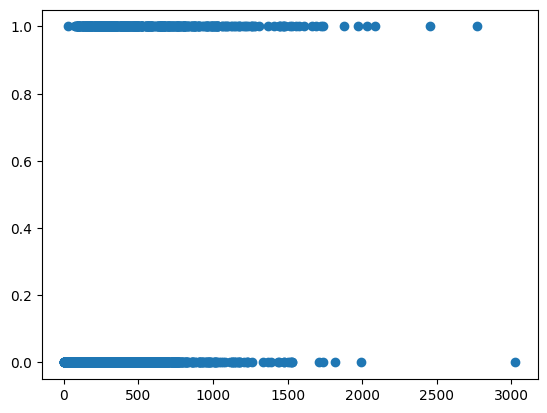

In [47]:
plt.scatter(df_num['duration'], df_num['y_yes'])

(array([32.,  8.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00130265, 0.10117239, 0.20104212, 0.30091186, 0.40078159,
        0.50065133, 0.60052106, 0.7003908 , 0.80026053, 0.90013027,
        1.        ]),
 <BarContainer object of 10 artists>)

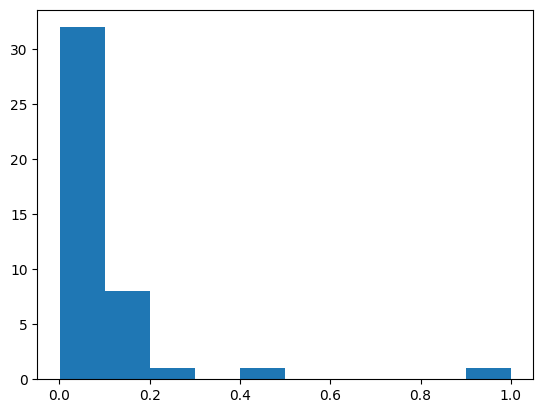

In [46]:
plt.hist(so['y_yes'])
